In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('madison_lakes.csv')
df

,ABUNDANCE,BIOMAS,GENUS_SPECIES,SAMPLE_DESC,PLOT,LATITUDE,LONGITUDE,DAY,MONTH,YEAR
0,202544,0,Calanoid,FI_35605_1_16,NaN,43.09885,-89.40545,24,6,1997
1,2832,0,Ceriodaphnia lacustris,FI_35605_1_16,NaN,43.09885,-89.40545,24,6,1997
2,2832,0,Chydorus,FI_35605_1_16,NaN,43.09885,-89.40545,24,6,1997
3,943760,0,Copepod nauplii,FI_35605_1_16,NaN,43.09885,-89.40545,24,6,1997
4,92656,0,Cyclopoid,FI_35605_1_16,NaN,43.09885,-89.40545,24,6,1997
...,...,...,...,...,...,...,...,...,...,...
7326,707,0,Diaptomid,WI_41946_1_3,NaN,43.05258,-89.42499,3,11,2014
7327,1415,0,Mesocyclops edax,WI_41946_1_3,NaN,43.05258,-89.42499,3,11,2014
7328,150667,0,Sinobosmina fryei,WI_41946_1_3,NaN,43.05258,-89.42499,3,11,2014
7329,20513,0,Tropocyclops,WI_41946_1_3,NaN,43.05258,-89.42499,3,11,2014


In [8]:
df['GENUS_SPECIES'] = df['GENUS_SPECIES'].str.lower()
df['GENUS_SPECIES'].value_counts()

GENUS_SPECIES
diaptomid                    730
copepod nauplii              711
diacyclops thomasi           649
daphnia pulicaria            633
daphnia mendotae             602
chydorus                     474
mesocyclops edax             472
aglaodiaptomus clavipes      459
cyclopoid                    341
sinobosmina fryei            302
copepodites                  295
diaphanosoma birgei          274
daphnia                      263
leptodora kindti             253
acanthocyclops               220
daphnia retrocurva           185
calanoid                     175
tropocyclops prasinus         65
bythotrephes longimanusa      54
alona                         42
daphnia parvula               38
tropocyclops                  34
ceriodaphnia lacustris        22
harpacticoid                  16
unidentified                   5
camptocercus rectirostris      5
pleuroxus procurvus            4
acroperus harpae               3
leydigia acanthocercoides      2
simocephalus                 

In [20]:
df['date'] = df['YEAR'].astype(str) + '-' + df['MONTH'].astype(str) + '-' + df['DAY'].astype(str)
df['date'] = pd.to_datetime(df['date'])
df

,ABUNDANCE,BIOMAS,GENUS_SPECIES,SAMPLE_DESC,PLOT,LATITUDE,LONGITUDE,DAY,MONTH,YEAR,date
0,202544,0,calanoid,FI_35605_1_16,NaN,43.09885,-89.40545,24,6,1997,1997-06-24
1,2832,0,ceriodaphnia lacustris,FI_35605_1_16,NaN,43.09885,-89.40545,24,6,1997,1997-06-24
2,2832,0,chydorus,FI_35605_1_16,NaN,43.09885,-89.40545,24,6,1997,1997-06-24
3,943760,0,copepod nauplii,FI_35605_1_16,NaN,43.09885,-89.40545,24,6,1997,1997-06-24
4,92656,0,cyclopoid,FI_35605_1_16,NaN,43.09885,-89.40545,24,6,1997,1997-06-24
...,...,...,...,...,...,...,...,...,...,...,...
7326,707,0,diaptomid,WI_41946_1_3,NaN,43.05258,-89.42499,3,11,2014,2014-11-03
7327,1415,0,mesocyclops edax,WI_41946_1_3,NaN,43.05258,-89.42499,3,11,2014,2014-11-03
7328,150667,0,sinobosmina fryei,WI_41946_1_3,NaN,43.05258,-89.42499,3,11,2014,2014-11-03
7329,20513,0,tropocyclops,WI_41946_1_3,NaN,43.05258,-89.42499,3,11,2014,2014-11-03


In [22]:
dia = df[df['GENUS_SPECIES'] == 'diaptomid']

<Axes: >

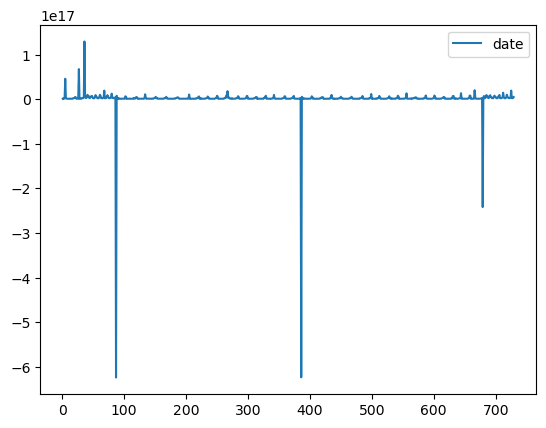

In [36]:
diffs = dia['date'].diff().reset_index().drop(columns='index')
diffs.plot()

In [67]:
dia.loc[:, 'sample'] = dia['SAMPLE_DESC'].str.split('_')
dia.loc[:, 'sample'] = dia['sample'].apply(lambda val: val[0])

<Axes: >

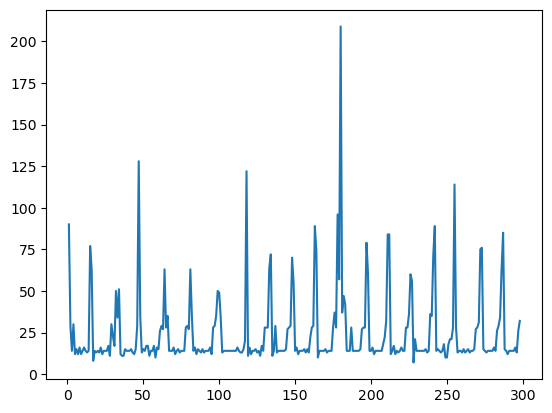

In [95]:
dia[dia['sample'] == 'ME']['date'].diff().reset_index().drop(columns = ['index']).apply(lambda val: val.date.days, axis = 1).plot()


In [90]:
a.iloc[1].date.days

90